# LINEAR REGRESSION with STOCHASTIC GD.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Reading the data
### Column 0 is unwanted so droping it.

In [2]:
df=pd.read_csv('house.csv')
df.drop('Unnamed: 0', axis=1,inplace=True)
X = df[['bd','sqft']].to_numpy()

## Outliers may affect our model, in order to avoid it, features are normalized. Column of 1's is added to the X variable.

In [3]:
def feature_normalize(X):
    n_features = X.shape[1]
    means = np.array([np.mean(X[:,i]) for i in range(n_features)])
    stddevs = np.array([np.std(X[:,i]) for i in range(n_features)])
    normalized = (X - means) / stddevs

    return normalized

X = feature_normalize(X)
X = np.column_stack((np.ones(len(X)), X))
print(X)

[[ 1.         -1.34110196 -0.67537445]
 [ 1.          1.34246879  1.91600044]
 [ 1.          1.34246879  0.70669216]
 ...
 [ 1.          0.44794521 -0.19465563]
 [ 1.          0.44794521  0.54520068]
 [ 1.         -0.44657838 -0.62279583]]


## y variable has the target/values to be predicted.

In [4]:
y = df['price'].values / 1000
print(y)

[451. 899. 944. ... 687. 750. 644.]


In [5]:
theta = np.zeros(X.shape[1])
print(theta)

[0. 0. 0.]


### Coverting the row vector to column vector.

In [6]:
y=y.reshape(-1,1)
print(y)

[[451.]
 [899.]
 [944.]
 ...
 [687.]
 [750.]
 [644.]]


# Matrix form of the of the solution for the model parameters.
# a = inverse( X′ X ) X′ y

In [7]:
np.matmul((np.matmul((np.linalg.inv(np.matmul(X.T,X))),X.T)),y)

array([[659.3833653 ],
       [111.79044715],
       [ 53.26330653]])

# To find the optimal parameters a we needed the gradient of J(a) when we used the gradient descent algorithm

# ∇w.r.t.a ( J(a) ) = 1/m ( X′X a − X′ y )

# alpha is the learning rate.

# In stochastic GD a random row of X variable is selected, and gradient is calculated for that point.
# The values of theta (a) are adjusted according to the gradient calculated.

# Stohastic GD is faster than GD, the gradients are not calulated for entire dataset. 

In [8]:
def cal_cost(theta,X,y):

    cost =  np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))
    return cost

def sto_gradient_descent(X, y, theta, alpha, iterations):
    
    
    r_list=random.sample(list(y), 5000)
    m=len(r_list)

    J_history_2  = []
    theta_1_hist = []
    theta_2_hist = []
    cost =0.0
    eps = 1
    i = 0
    while eps > 0.1:
        rand_ind = np.random.randint(0,m)
        X_i = X[rand_ind,:].reshape(1,X.shape[1])
        y_i = y[rand_ind].reshape(1,1)
        prediction = X_i.T.dot((np.dot(X_i,theta) - y_i))
        
        theta = theta -(1/m) * alpha *(prediction ) 
        theta[0] = 659
        cost = cal_cost(theta,X_i,y_i)
        
        J_history_2.append(cost)
        theta_1_hist.append(theta[1])
        theta_2_hist.append(theta[2])
        eps = np.linalg.norm(prediction,ord=2)
        
        i+=1
    
    return theta,theta_1_hist,theta_2_hist, J_history_2
        
        
theta = np.random.randn(3, 1)
alpha = 20
iterations = 1

theta_result,theta_0, theta_1, J_history= sto_gradient_descent(X,y,theta,alpha,iterations)

In [9]:
J_history = np.array(J_history)

In [10]:
J_history.shape

(36,)

In [11]:
#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(range(-20,200,6),range(-20,200,6))

In [12]:
#Computing the cost function for each theta combination
zs = np.array(  [cal_cost(np.array([659.383,t0,t1]).reshape(-1,1),X, y,) for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values    
Z = zs.reshape(T0.shape)

# SURFACE PLOT & CONTOUR PLOT

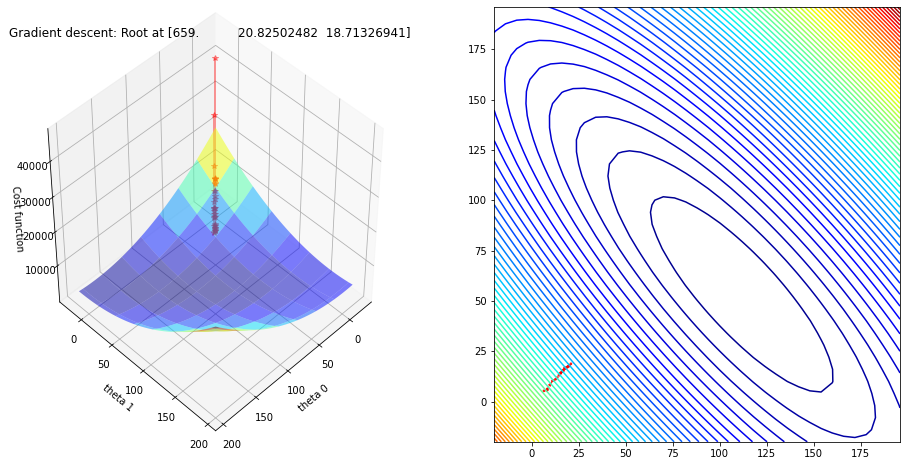

In [13]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Angles needed for quiver plot
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0,theta_1,J_history, marker = '*', color = 'r', alpha = .4, label = 'Stochaistic Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function')
ax.set_title('Gradient descent: Root at {}'.format(theta_result.ravel()))
ax.view_init(45, 45)


# #Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.show()

# Stochastic GD has noise and thus jumps up and down during iterations.